In [621]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from PenultimateFRP import CopolymerizationModel
%load_ext autoreload
%autoreload 2

# Define the full model function
def model(t, kd, f, kpAA, kpAB, kpBA, kpBB, 
     kdAA, kdAB, kdBA, kdBB,
     ktcAA, ktcAB, ktcBB,
     ktdAA, ktdAB, ktdBB): 
    k = [kd, f, 
     kpAA, kpAB, kpBA, kpBB, 
     kdAA, kdAB, kdBA, kdBB,
     ktcAA, ktcAB, ktcBB,
     ktdAA, ktdAB, ktdBB]
    
    y0[0] = 0.005
    y0[2] = 0.5
    y0[3] = 0.5
    cm9 = CopolymerizationModel(k, y0, t_span)

    return cm9

# Modified function factory
def create_wrapper(model_func, fixed_params, initial_guesses):
    fit_params = [p for p in initial_guesses if p not in fixed_params]
    fit_guesses = [initial_guesses[p] for p in fit_params]

    bounds = {}
    for key, value in zip(fit_params, fit_guesses):
        bounds[key] = (0, 1e3 * value)
    
    keys = list(bounds.keys())
    values = list(bounds.values())

    #Initialize lower bounds and upper bounds lists
    lower_bounds = [bound[0] for bound in values]
    upper_bounds = [bound[1] for bound in values]

    # Convert the lists to tuples
    fit_bounds = (lower_bounds, upper_bounds)

    def fit_func(x, *args):
        params = {key: value for key, value in zip(fit_params, args)}
        params.update(fixed_params)
        #print(params)
        return model_func(x, **params)
    
    return fit_func, fit_guesses, fit_bounds


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [622]:
# Initiation rate constant
kd    = 3e-06 
f     = 0.5

# Propagation rate constants
kpAA = 2.0e+04
kpAB = 5.0e+04
kpBA = 4.0e+02
kpBB = 8.0e+02

# Depropagation rate constants
kdAA = 0
kdAB = 0
kdBA = 0
kdBB = 0
kdf = 0.5
# kdAA = kdf*kpAA
# kdAB = kdf*kpAB
# kdBA = kdf*kpBA
kdBB = kdf*kpBB

# Termination by combination rate constants
# ktcAA = 2*1.5e+08
# ktcAB = 2*5.0e+07
# ktcBB = 2*1.5e+07
ktcAA = 0
ktcAB = 0
ktcBB = 0

# Termination by disproportionation rate constants
ktdAA = 2*9.0e+06     
ktdAB = 2*1.5e+07
ktdBB = 2*2.0e+07

k_params = {
     'kd': kd, 'f': f,
     'kpAA': kpAA, 'kpAB': kpAB, 'kpBA': kpBA, 'kpBB': kpBB,
     'kdAA': kdAA, 'kdAB': kdAB, 'kdBA': kdBA, 'kdBB': kdBB,
     'ktcAA': ktcAA, 'ktcAB': ktcAB, 'ktcBB': ktcBB,
     'ktdAA': ktdAA, 'ktdAB': ktdAB, 'ktdBB': ktdBB
}

In [623]:
# Data for fitting
num_points = 40
t_span = [0, 60*3600]
t = np.linspace(t_span[0], t_span[1], num_points)
y0 = np.zeros(11)

In [624]:
cm = model(t, **k_params)

cm.mom_sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-10 ...  2.157e+05  2.160e+05]
        y: [[ 5.000e-03  5.000e-03 ...  2.618e-03  2.615e-03]
            [ 0.000e+00  1.500e-18 ...  6.494e-12  6.504e-12]
            ...
            [ 0.000e+00  1.709e-33 ...  1.195e-09  1.193e-09]
            [ 0.000e+00  3.307e-62 ...  2.374e-03  2.376e-03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 429
     njev: 6
      nlu: 47

(0.0, 0.015)

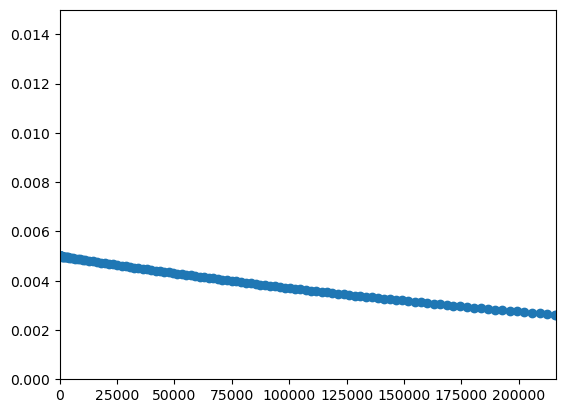

In [625]:
plt.plot(cm.mom_sol.t, cm.mom_sol.y[0], 'o-')
plt.xlim(t_span)
plt.ylim([0, 0.015])